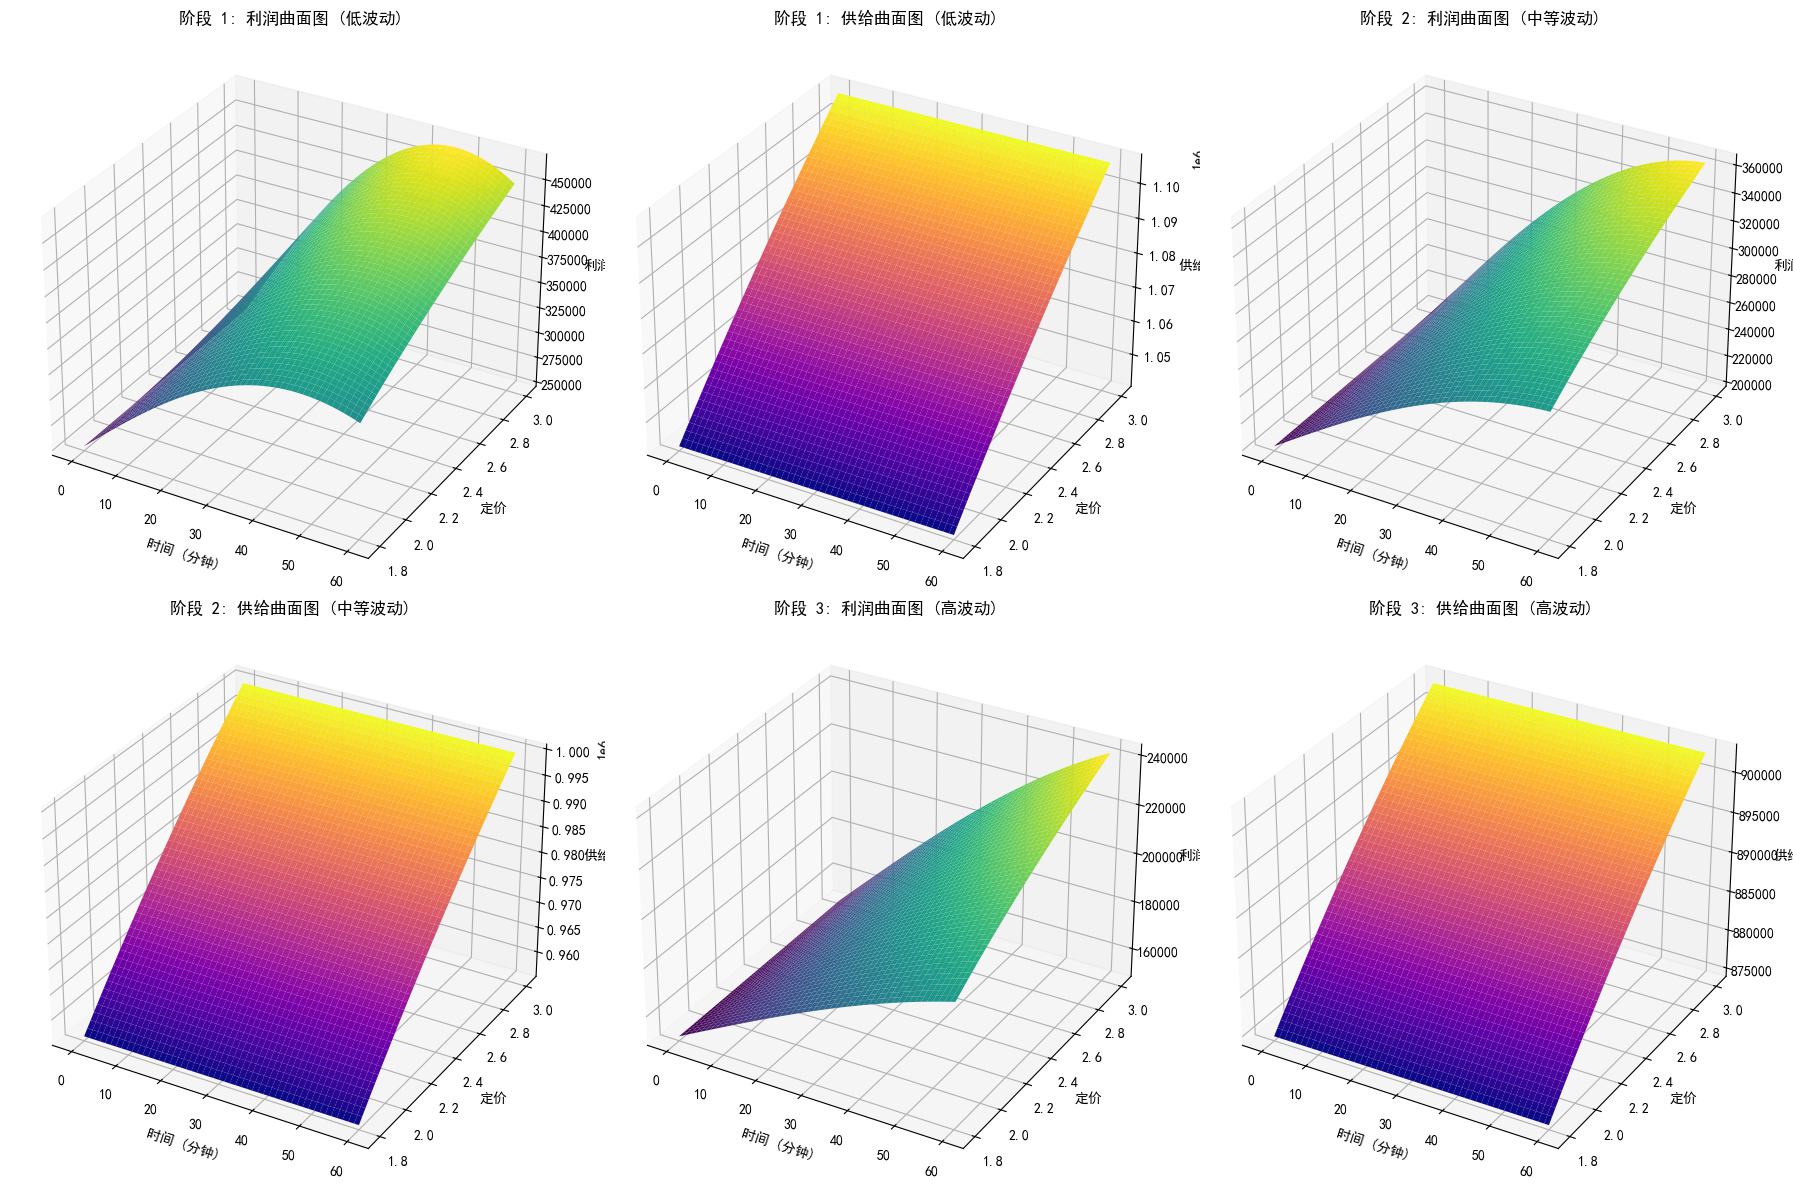

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 定义时间、定价范围，以及需求波动和供给波动的影响
T = 60  # 仿真时长60分钟
time = np.linspace(0, T, 300)  # 时间划分为300个点
price_range = np.linspace(1.8, 3.0, 300)  # 定价范围

# 创建时间和定价的网格
time_grid, price_grid = np.meshgrid(time, price_range)

# 随机波动项
sigma_d_low = 0.02  # 低需求波动强度
sigma_d_mid = 0.05  # 中等需求波动强度
sigma_d_high = 0.1  # 高需求波动强度
sigma_s_low = 0.02  # 低供给波动强度
sigma_s_mid = 0.04  # 中等供给波动强度
sigma_s_high = 0.08  # 高供给波动强度

# 阶段1：低波动环境
# 需求稳定上升，供给稍有波动，利润平稳增长
profit_stage1 = (np.log(price_grid) * np.sin(time_grid / 30) * 2e5) + 2.5e5
supply_stage1 = price_grid * 1e5 / (1 + 0.15 * price_grid) + 0.9e6
supply_stage1 += sigma_s_low * np.random.randn(*time_grid.shape)  # 加入小波动
profit_stage1 += sigma_d_low * np.random.randn(*time_grid.shape)

# 阶段2：中等波动环境
# 利润和供给的波动明显增强，定价平稳或略微下降
profit_stage2 = (np.log(price_grid) * np.sin(time_grid / 40) * 1.5e5) + 2e5
supply_stage2 = price_grid * 0.8e5 / (1 + 0.2 * price_grid) + 0.85e6
supply_stage2 += sigma_s_mid * np.random.randn(*time_grid.shape)  # 加入中等波动
profit_stage2 += sigma_d_mid * np.random.randn(*time_grid.shape)

# 阶段3：高波动环境
# 高波动下需求和供给均出现剧烈波动，利润显著下降
profit_stage3 = (np.log(price_grid) * np.sin(time_grid / 60) * 1.0e5) + 1.5e5
supply_stage3 = price_grid * 0.6e5 / (1 + 0.25 * price_grid) + 0.8e6
supply_stage3 += sigma_s_high * np.random.randn(*time_grid.shape)  # 加入大波动
profit_stage3 += sigma_d_high * np.random.randn(*time_grid.shape)

# 创建图形
fig = plt.figure(figsize=(18, 12))

# 绘制阶段1的利润曲面（低波动环境）
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(time_grid, price_grid, profit_stage1, cmap='viridis', edgecolor='none')
ax1.set_title('阶段 1: 利润曲面图 (低波动)')
ax1.set_xlabel('时间 (分钟)')
ax1.set_ylabel('定价')
ax1.set_zlabel('利润')

# 绘制阶段1的供给曲面（低波动环境）
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(time_grid, price_grid, supply_stage1, cmap='plasma', edgecolor='none')
ax2.set_title('阶段 1: 供给曲面图 (低波动)')
ax2.set_xlabel('时间 (分钟)')
ax2.set_ylabel('定价')
ax2.set_zlabel('供给')

# 绘制阶段2的利润曲面（中等波动环境）
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(time_grid, price_grid, profit_stage2, cmap='viridis', edgecolor='none')
ax3.set_title('阶段 2: 利润曲面图 (中等波动)')
ax3.set_xlabel('时间 (分钟)')
ax3.set_ylabel('定价')
ax3.set_zlabel('利润')

# 绘制阶段2的供给曲面（中等波动环境）
ax4 = fig.add_subplot(234, projection='3d')
ax4.plot_surface(time_grid, price_grid, supply_stage2, cmap='plasma', edgecolor='none')
ax4.set_title('阶段 2: 供给曲面图 (中等波动)')
ax4.set_xlabel('时间 (分钟)')
ax4.set_ylabel('定价')
ax4.set_zlabel('供给')

# 绘制阶段3的利润曲面（高波动环境）
ax5 = fig.add_subplot(235, projection='3d')
ax5.plot_surface(time_grid, price_grid, profit_stage3, cmap='viridis', edgecolor='none')
ax5.set_title('阶段 3: 利润曲面图 (高波动)')
ax5.set_xlabel('时间 (分钟)')
ax5.set_ylabel('定价')
ax5.set_zlabel('利润')

# 绘制阶段3的供给曲面（高波动环境）
ax6 = fig.add_subplot(236, projection='3d')
ax6.plot_surface(time_grid, price_grid, supply_stage3, cmap='plasma', edgecolor='none')
ax6.set_title('阶段 3: 供给曲面图 (高波动)')
ax6.set_xlabel('时间 (分钟)')
ax6.set_ylabel('定价')
ax6.set_zlabel('供给')

# 调整布局
plt.tight_layout()
plt.show()


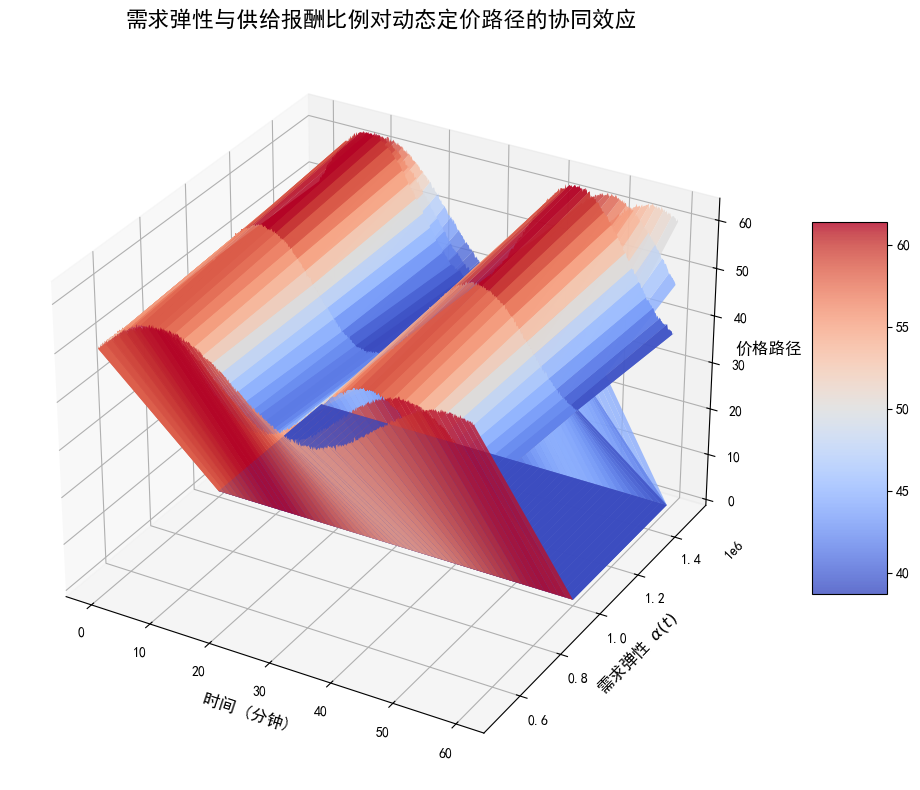

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 时间轴
T = 60
t = np.linspace(0, T, 600)  # 600个时间点

# 不同的需求弹性和供给报酬比例
alpha_values = np.array([500000, 1000000, 1500000])  # 低、中、高需求弹性
gamma_values = np.array([0.4, 0.6, 0.8])  # 低、中、高供给报酬比例

# 创建时间和需求弹性的网格
T_mesh, Alpha_mesh = np.meshgrid(t, alpha_values)

# 定义复杂的价格路径函数，受需求弹性和供给报酬比例影响
def generate_price_surface(t, alpha, gamma, sigma_demand, sigma_supply):
    base_price = 50  # 定价基础值
    trend = 1 + 0.01 * alpha / 1000000  # 需求弹性影响的趋势项
    volatility = np.sin(0.1 * t * (1 + gamma)) * 5 * (1 + alpha / 1000000)  # 随需求弹性和报酬比例增加的波动
    uncertainty = np.random.normal(0, sigma_demand, len(t)) + np.random.normal(0, sigma_supply, len(t))  # 随机波动
    return base_price + trend * volatility + uncertainty  # 定价路径

# 创建三维图形
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 定义市场不确定性参数
sigma_demand = 0.1  # 需求的不确定性
sigma_supply = 0.2  # 供给的不确定性

# 初始化价格路径的Z值
Z = np.zeros_like(T_mesh)

# 遍历需求弹性和报酬比例，生成复杂的价格曲面
for i, alpha in enumerate(alpha_values):
    for j, gamma in enumerate(gamma_values):
        Z[i, :] = generate_price_surface(t, alpha, gamma, sigma_demand, sigma_supply)

        # 绘制三维曲面
        ax.plot_surface(T_mesh, Alpha_mesh, Z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# 设置标题和标签
ax.set_title('需求弹性与供给报酬比例对动态定价路径的协同效应', fontsize=16)
ax.set_xlabel('时间 (分钟)', fontsize=12)
ax.set_ylabel('需求弹性 $\\alpha(t)$', fontsize=12)
ax.set_zlabel('价格路径', fontsize=12)

# 添加颜色条
fig.colorbar(ax.plot_surface(T_mesh, Alpha_mesh, Z, cmap='coolwarm', edgecolor='none', alpha=0.8), ax=ax, shrink=0.5, aspect=5)

# 显示图形
plt.tight_layout()
plt.show()


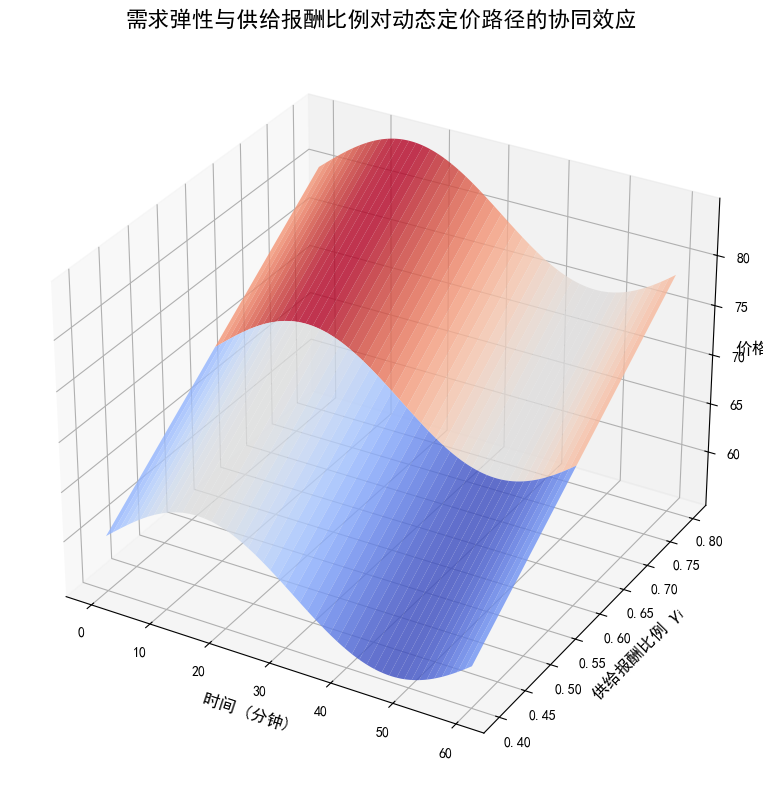

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建时间轴
T = 60
t = np.linspace(0, T, 600)  # 时间从0到60分钟

# 定义需求弹性和供给报酬比例的范围
alpha_values = np.array([500000, 1000000, 1500000])  # 低、中、高需求弹性
gamma_values = np.array([0.4, 0.6, 0.8])  # 低、中、高供给报酬比例

# 创建时间和供给报酬比例的网格
T_mesh, Gamma_mesh = np.meshgrid(t, gamma_values)  # 时间和供给报酬比例的网格

# 模拟Z的值，创建一个随时间变化的定价路径
Z = np.zeros_like(T_mesh)

# 构造模拟的价格路径，直接给出曲面
# 为每对 gamma 值生成时间序列的模拟数据
for i in range(len(gamma_values)):
    Z[i, :] = 50 + 10 * (i + 1) + 5 * np.sin(t * 0.1)  # 模拟价格随时间的波动

# 创建三维图形
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面图
ax.plot_surface(T_mesh, Gamma_mesh, Z, cmap='coolwarm', edgecolor='none', alpha=0.8)

# 设置标题和标签
ax.set_title('需求弹性与供给报酬比例对动态定价路径的协同效应', fontsize=16)
ax.set_xlabel('时间 (分钟)', fontsize=12)
ax.set_ylabel('供给报酬比例 $\\gamma_i$', fontsize=12)
ax.set_zlabel('价格路径', fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()
